# NARU - Laboratory #

This project relies on `Python 3.8`, using another version might not 
work with the dependencies used in this project!

Dependencies:

- `conda install -c anaconda bcolz ` : Loading token / vector dictionary
<br>

- `conda install pytorch torchvision torchaudio cudatoolkit=10.2 -c pytorch` : Math 
    - or: `conda install pytorch torchvision torchaudio cpuonly -c pytorch -c=conda-forge`
<br> 


- `conda install -c conda-forge spacy` : Tokenization
<br>

- `conda install -c conda-forge matplotlib`
<br>

- `conda install -c anaconda seaborn ` : Plot styling

## Loading the dependencies ##

In [40]:
%load_ext autoreload
%autoreload 1

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [41]:
%aimport lib.trainer
%aimport lib.ffnaru
%aimport lib.embedding
%aimport lib.data_loader 

In [42]:
import torch
from lib.embedding import Encoder
from lib.model.ffnaru import Network
from lib.data_loader import load_jokes
from lib.trainer import exec_trial_with_autograd
from lib.model.persist import save_params, load_params
from lib.net_analysis import avg_sequence_length, load_and_plot
import time

## Loading Data - Jokes ##

In [43]:
import random

def list_splitter(list_to_split, ratio):
    elements = len(list_to_split)
    middle = int(elements * ratio)
    return list_to_split[:middle], list_to_split[middle:]

jokes = load_jokes()
random.Random(42).shuffle(jokes)

print('First joke in the data-set:\n',jokes[0],'\n')

training_data, test_data = list_splitter(jokes, 0.8)

training_data = jokes[:20]
test_data = jokes[20:30]


First joke in the data-set:
 ['I', 'just', 'read', 'this', 'article', 'about', 'short', 'term', 'memory', 'I', 'do', "n't", 'remember', 'what', 'it', 'was', 'about'] 



## Data Overview ##

In [38]:

print('Number of training samples: ',len(training_data))
print('Number of test samples: ', len(test_data))
print('Average sequence length: ', avg_sequence_length(jokes))

Number of training samples:  20
Number of test samples:  10
Average sequence length:  18.144882860665845


## Training & Evaluation of Feed-Forward-NARU Model ##

Checking for ".pkl" embedding files...

Start trial now!
Number of training samples: 20 
 Number of test samples: 10 
 Batch size:  20
----------------------------------------------------------------------------
Initial full batch training: 1 of 20 completed!
Initial full batch training: 2 of 20 completed!
Initial full batch training: 3 of 20 completed!
Initial full batch training: 4 of 20 completed!
Initial full batch training: 5 of 20 completed!
Initial full batch training: 6 of 20 completed!
Initial full batch training: 7 of 20 completed!
Initial full batch training: 8 of 20 completed!
Initial full batch training: 9 of 20 completed!
Initial full batch training: 10 of 20 completed!
Initial full batch training: 11 of 20 completed!
Initial full batch training: 12 of 20 completed!
Initial full batch training: 13 of 20 completed!
Initial full batch training: 14 of 20 completed!
Initial full batch training: 15 of 20 completed!
Initial full batch training: 16 of 20 completed!
Initial full 

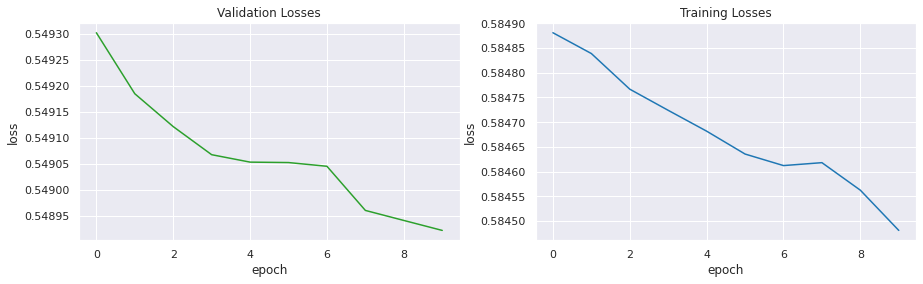

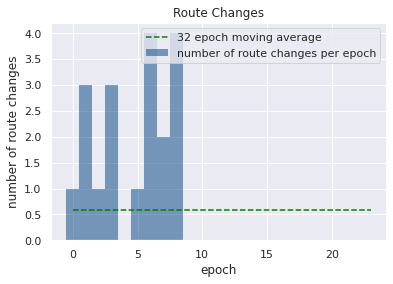

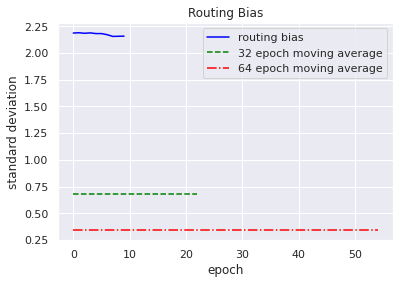

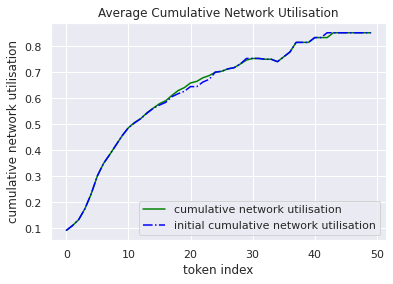

Saving model to " /home/gleethos/Documents/research/NARU/models/feed-forward-NARU " now! ...
FFNN-NARU Training done!
k978-1 k978-1 k978-1 k978-1 k978-1 k978-1 k978-1 k978-1 k978-1


In [39]:
# feed-forward-NARU
model = Network( # feed-forward-NARU
    depth=7,
    max_height=18,
    max_dim=128,
    max_cone=6,
    D_in=50,
    D_out=50,
    with_bias=False
)
#target_folder = 'models/feed-forward-NARU'#+'_'+time.strftime("%Y%m%d-%H%M%S")+'/'
#model.set_params(load_params(target_folder))
 
for W in model.get_params(): W.requires_grad = True

encoder = Encoder() # Token to vectors and vectors to tokens!

for i in range(1): # Outer loop for saving the model from time to time...
    choice_matrices = exec_trial_with_autograd(
        model=model,
        encoder=encoder,
        optimizer=torch.optim.Adam(model.get_params(), lr=0.0001),
        training_data=training_data,
        test_data=test_data,
        epochs=10,
        path=target_folder
    )
    #print(choice_matrices)
    # SAVING PARAMETERS:
    save_params( model, target_folder )


print('FFNN-NARU Training done!')

test_sentence = encoder.sequence_words_in('What did the bartender say to the jumper cables ?'.split())
pred_vecs = model.pred(test_sentence)
print(' '.join(encoder.sequence_vecs_in(pred_vecs)))


## Analysis ##


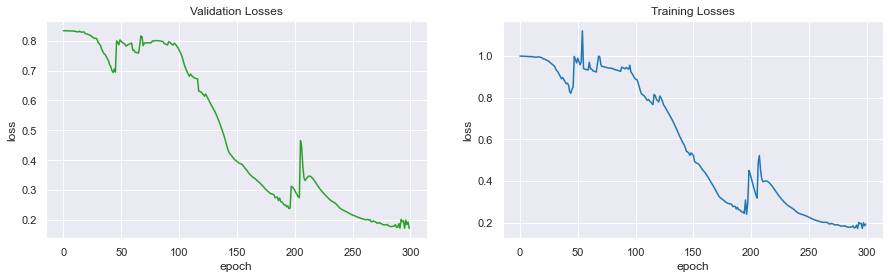

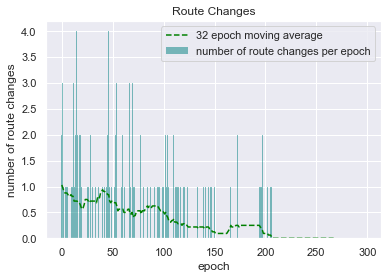

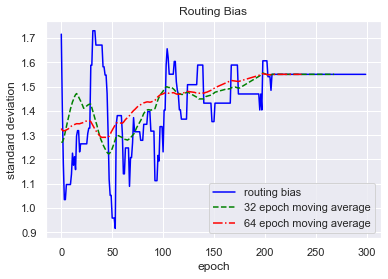

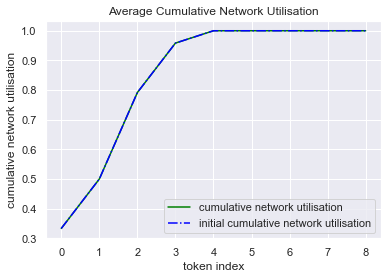

In [12]:
load_and_plot(data_path='models/data/', plot_path='models/plots/')


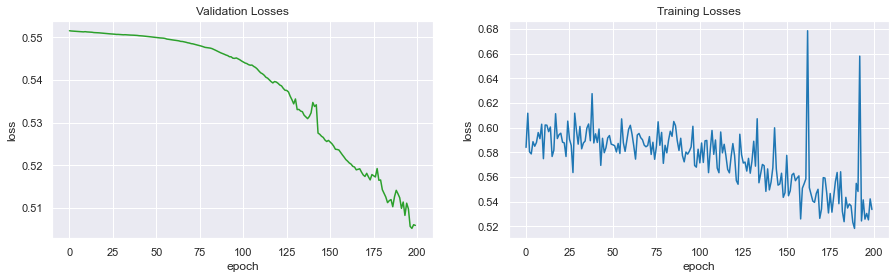

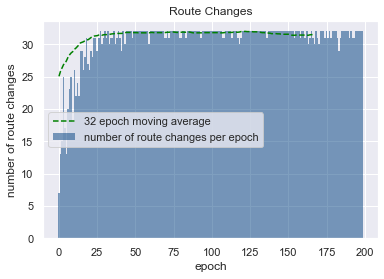

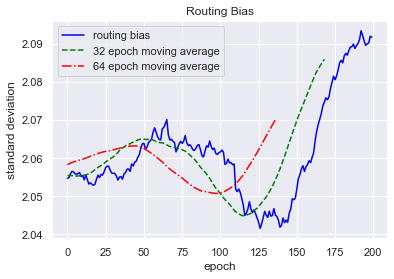

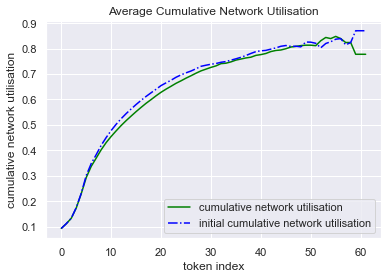

In [5]:

def preprocess(data):
    training = data['loss']['training']
    for i in range(len(training)):
        if training[i] > 1:
            training[i] /= 2
    return data

token = '20210520-213044'

load_and_plot(
    data_path='models/test_model/directed-NARU-net_'+token+'/data/', 
    plot_path='models/test_model/directed-NARU-net_'+token+'/plots/',
    preprocessor=preprocess
)



In [ ]:

def mish(x)
    
